## Project Topic：What factors made people more likely to survive?

#### Requirements:

What to include in your submission:
- A note specifying which dataset you analyzed
- A statement of the question(s) you posed
- A description of what you did to investigate those questions
- Documentation of any data wrangling you did
- Summary statistics and plots communicating your final results
- Code you used to perform your analysis. 
- A list of Web sites, books, forums, blog posts, github repositories, etc. that you referred to or used in creating your submission (add N/A if you did not use any such resources).

#### Titanic Data:
- Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

## 1. Import the Moduls and Read the Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
# read the file
titanic = pd.read_csv('titanic-data.csv')

## 2. Initial Exploration
- First, take a broad overview of the dataset to check the types of data and the typical content.


In [57]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### The Data Overview
- PassengerId -- is the ordinal ID for each passenger.
- Survived -- 1 if the passenger survived, and 0 if they did not.
- Pclass -- the passenger's cabin class from 1 to 3 where 1 was the highest class.
- Name -- full name of the passenger.
- Sex -- the passenger's gender, male and female.
- Age -- The passenger's age, in integer format.
- SibSp -- ordinal integer describing the number of siblings or spouses travelling with each passenger.
- Parch -- ordinal integer describing the number of parents or children travelling with each passenger.
- Ticket -- the ticket number, in string format.
- Fare -- the amount the passenger paid for their ticket.
- Cabin -- the cabin number of each passenger.
- Embarked -- Either C, Q, or S, to indicate which port the passenger boarded the ship from.


In [20]:
# Check the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### The Data Summary 
- Through checking the data types, it shows that we have two floating point varaibles (Age and Fare), five string features (Name, Sex, Embarked, Ticket, Cabin), and five integer features (PassengerId, Survived, Pclass, SibSp, Parch).
- From the first 10 rows of the table, we can see many of the columns, such as Age and Carbin, having missing values. Thus, we need to deal with the missing data before conducting analysis.


### Missing Values

In [28]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [30]:
len(titanic['Age'])

891

- In the dataset, most Cabin numbers are missing, together with 177 Age values and 2 Embarked values.
- The count of missing values plays a vital role in defining the validity of making inferences. Thus, any analysis based on the columns with missing data will either have to be removed from the analysis or need to be highlighted and requires special considerations. 
- In this dataset, the effect values of Age include 714 rows (891/177) and Embarked are 889 rows (891/2) so they could be used in the further analysis after cleaning. However, the Cabin miss lots of data (687/891), this variable makes no sense in any analysis. 

In [41]:
# get the effect values

Age_is_null = pd.isnull(titanic["Age"])
New_Age = titanic['Age'][Age_is_null == False]
print(len(New_Age))

Embarked_is_null = pd.isnull(titanic['Embarked'])
New_Embarked = titanic['Embarked'][Embarked_is_null == False]
print(len(New_Embarked))


714
889


In [65]:
# Drop Missing Values and form a new dataset
# axis=0 or axis='index' will drop any rows that have null values 
# axis=1 or axis='columns' will drop any columns that have null values
drop_na_rows = titanic.dropna(axis=0)
drop_na_columns = titanic.dropna(axis=1)

new_titanic = titanic.dropna(axis=0,subset=["Age", "Embarked"])
new_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [70]:
# Reindexing Rows -- DataFrame.reset_index(), so the row indexes start from 0 and the old index is dropped.
titanic_reindexed = new_titanic.reset_index(drop=True)
print(titanic_reindexed.iloc[0:4,0:2])


   PassengerId  Survived
0            1         0
1            2         1
2            3         1
3            4         1


## 3. Data Analysis -- What factors made people more likely to survive?

#### 3.1 The Overall Survived Rate

In [182]:
survived_rate=float(titanic['Survived'].sum())/titanic['Survived'].count()  # add the float() to see the exact number
print(survived_rate)

0.383838383838


In [184]:
def survived_rate(x):
    rate = (titanic.groupby([x]).sum()/titanic.groupby([x]).count())['Survived']
    return rate  

#### 3.2 Sex and Survived Rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


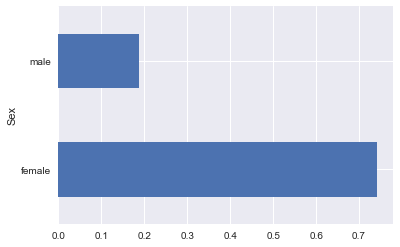

In [185]:
Sex_survived_rate = survived_rate('Sex')
print(Sex_survived_rate)
Sex_survived_rate.plot(kind='barh')

#### 3.3 Pclass and Survived Rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


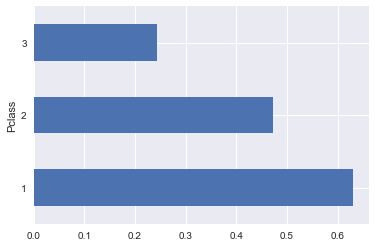

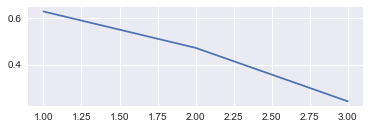

In [186]:
Pclass_survived_rate = survived_rate('Pclass')
print(Pclass_survived_rate)

Pclass_survived_rate.plot(kind='barh')

fig = plt.figure()
ax = fig.add_subplot(2,1,1)  
ax.plot(Pclass_survived_rate)   

#### 3.4 Age and Survived Rate

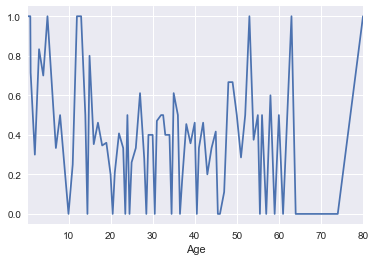

In [189]:

Age_survived_rate = survived_rate('Age')

Age_survived_rate.plot()

In [190]:
new_age = titanic['Age'].dropna().values
type(new_age)

numpy.ndarray

/Users/Applebigbig/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


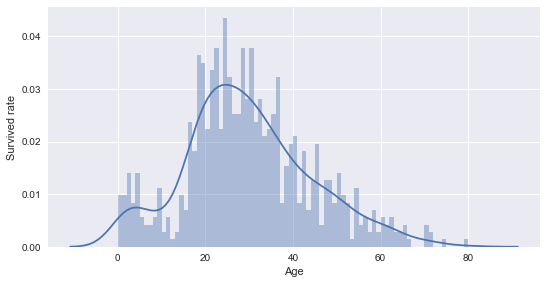

In [192]:
plt.figure(figsize=[30,15])
plt.subplot(331)
sns.distplot(new_age, bins=range(0, 81, 1),kde=True)

plt.xlabel('Age')
plt.ylabel('Survived rate')



#### 3.5 SibSp and Survived Rate

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


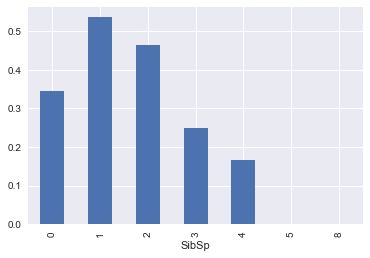

In [193]:
SibSp_Survived_rate = survived_rate('SibSp')
print(SibSp_Survived_rate)
SibSp_Survived_rate.plot(kind='bar')


#### 3.6 Parch and Survived Rate

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


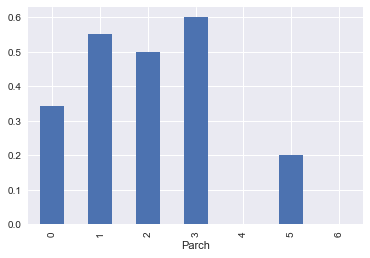

In [194]:
Parch_Survived_rate = survived_rate('Parch')
print(Parch_Survived_rate)
Parch_Survived_rate.plot(kind='bar')

#### 3.7 Embarked and Survived rate


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


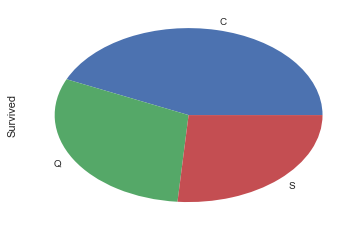

In [197]:
Embarked_Survived_rate = survived_rate('Embarked')
print(Embarked_Survived_rate)
Embarked_Survived_rate.plot(kind='pie')

In [151]:
# calculate fares_by_class
passenger_classes = [1, 2, 3]
fares_by_class = {}
for x in passenger_classes:
    pclass_rows = titanic[titanic['Pclass'] == x]
    pclass_fares = pclass_rows['Fare']
    fares_for_class = pclass_fares.mean()
    fares_by_class[x] = fares_for_class
print(fares_by_class)

{1: 84.15468749999992, 2: 20.66218315217391, 3: 13.675550101832997}


In [156]:
passenger_age = titanic.pivot_table(index='Pclass',values='Age',aggfunc=np.mean)
print(passenger_age)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [158]:
port_stats = titanic.pivot_table(index='Embarked',values=['Fare','Survived'],aggfunc=np.mean)
print(port_stats)

               Fare  Survived
Embarked                     
C         59.954144  0.553571
Q         13.276030  0.389610
S         27.079812  0.336957
